# ChEMBL Dataset
This notebook uses the official ChEMBL Python client API, linked <a href="https://github.com/chembl/chembl_webresource_client/tree/master">here</a>.  
This notebook generates a .TXT file for TSH ligands of Family A G-protein Coupled Receptors to increase the overall data pool for the WGAN training

## Dependencies

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [8]:
DATA_PATH = "./data/d2_binders.csv"

### Only run following cells to originally call ChEMBL API and recieve data

In [5]:
from chembl_webresource_client.new_client import new_client
from chembl_webresource_client.utils import utils

# columns to be selected from API
col_select = ['molecule_chembl_id', 'canonical_smiles', 'relation', 'type', 'value']

# load in dataset of all compounds with reported activity w/ any target in ChEMBL database
d2_target = new_client.activity
# load in all Dopamine D2-specific (CHEMBL217) small mollecules w/ reported Ki value <= 5000, and investigated in humans
d2_binders = d2_target.filter(target_chembl_id__iexact='CHEMBL217', standard_type__iexact='ki',
                                    standard_value__lte=5000, target_organism='Homo sapiens').only(col_select)

print(f"\n# of D2 binders: {len(d2_binders)}")
print(f"\nExample Molecule: \n{d2_binders[0]}")


# of D2 binders: 9677

Example Molecule: 
{'canonical_smiles': 'NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3CCCN3)C(=O)N12', 'molecule_chembl_id': 'CHEMBL156651', 'relation': '=', 'type': 'Ki', 'value': '0.067'}


In [6]:
# cast JSON to Pandas DataFrame for easier use
d2_binders_ki = pd.DataFrame(d2_binders)

d2_binders_ki

,canonical_smiles,molecule_chembl_id,relation,type,value
0,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,CHEMBL156651,=,Ki,0.067
1,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,CHEMBL156651,=,Ki,190.0
2,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,CHEMBL156651,=,Ki,0.196
3,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,CHEMBL156651,=,Ki,260.0
4,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,CHEMBL156651,=,Ki,0.05
...,...,...,...,...,...
9672,Cc1ccc(C(C)C)c(OCc2nc(N)nc(N3CCN(C)CC3)n2)c1,CHEMBL4520796,=,Ki,1.09
9673,CC(Oc1ccccc1Cl)c1nc(N)nc(N2CCN(C)CC2)n1,CHEMBL4447416,=,Ki,1.0
9674,CCC(Oc1cccc(Cl)c1Cl)c1nc(N)nc(N2CCN(C)CC2)n1,CHEMBL4873623,=,Ki,0.42
9675,CCC(Oc1cc(Cl)ccc1Cl)c1nc(N)nc(N2CCN(C)CC2)n1,CHEMBL4860275,=,Ki,0.32


In [7]:
# save as CSV file
d2_binders_ki.to_csv("./data/d2_binders.csv")

### If data downloaded to local repository, read data from CSV file here

In [9]:
# read in all CB2 ligands w/ Ki information and other molecular properties
d2_molecules = pd.read_csv(DATA_PATH)

In [10]:
# remove all duplicates based off ChEMBL ID
# 12K molecules --> 2,724 unique CB2 ligands
d2_molecules = d2_molecules.drop_duplicates("molecule_chembl_id")

d2_molecules

,Unnamed: 0,canonical_smiles,molecule_chembl_id,relation,type,value
0,0,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,CHEMBL156651,=,Ki,0.067
8,8,CC1Cc2cccc3c2N1C(=O)C(N1CCN(Cc2ccc(Cl)cc2)CC1)CC3,CHEMBL349833,=,Ki,139.000
9,9,CC1(C)Cc2cccc3c2N1C(=O)C(N1CCN(Cc2ccc(Cl)cc2)C...,CHEMBL439646,=,Ki,201.000
10,10,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,CHEMBL87187,=,Ki,11.000
11,11,Cc1ccc(CN2CCN(C3CCc4cccc5c4N(CC5)C3=O)CC2)cc1,CHEMBL351963,=,Ki,209.000
...,...,...,...,...,...,...
9665,9665,Cc1cc(NC(=O)c2cccc(S(F)(F)(F)(F)F)c2)cc(-n2ccn...,CHEMBL4526351,>,Ki,10.000
9666,9666,CN1CCN(C(=O)C(C)(C)c2ccc(C(=O)Nc3cn4cc(-c5cc(C...,CHEMBL4576555,=,Ki,2752.000
9669,9669,O=C1C2C3CCC(C3)C2C(=O)N1CC1CCCCC1CN1CCN(c2nsc3...,CHEMBL5219924,=,Ki,1.700
9671,9671,CN1CCN(c2nc(N)nc(Cc3c[nH]c4ccccc34)n2)CC1,CHEMBL4086515,=,Ki,1.950


In [11]:
# describe columns
d2_molecules.describe()

,Unnamed: 0,value
count,7266.000000,7266.000000
mean,4805.113405,486.583913
std,2827.148626,917.794985
min,0.000000,-9.600000
25%,2322.250000,7.000000
50%,4784.500000,80.000000
75%,7212.750000,505.750000
max,9676.000000,5000.000000


In [14]:
# check for null values
d2_molecules.isnull().sum()

Unnamed: 0            0
canonical_smiles      0
molecule_chembl_id    0
relation              0
type                  0
value                 0
dtype: int64

In [13]:
# remove null value in "relation" column
d2_molecules.dropna(inplace=True)

d2_molecules

,Unnamed: 0,canonical_smiles,molecule_chembl_id,relation,type,value
0,0,NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3...,CHEMBL156651,=,Ki,0.067
8,8,CC1Cc2cccc3c2N1C(=O)C(N1CCN(Cc2ccc(Cl)cc2)CC1)CC3,CHEMBL349833,=,Ki,139.000
9,9,CC1(C)Cc2cccc3c2N1C(=O)C(N1CCN(Cc2ccc(Cl)cc2)C...,CHEMBL439646,=,Ki,201.000
10,10,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,CHEMBL87187,=,Ki,11.000
11,11,Cc1ccc(CN2CCN(C3CCc4cccc5c4N(CC5)C3=O)CC2)cc1,CHEMBL351963,=,Ki,209.000
...,...,...,...,...,...,...
9665,9665,Cc1cc(NC(=O)c2cccc(S(F)(F)(F)(F)F)c2)cc(-n2ccn...,CHEMBL4526351,>,Ki,10.000
9666,9666,CN1CCN(C(=O)C(C)(C)c2ccc(C(=O)Nc3cn4cc(-c5cc(C...,CHEMBL4576555,=,Ki,2752.000
9669,9669,O=C1C2C3CCC(C3)C2C(=O)N1CC1CCCCC1CN1CCN(c2nsc3...,CHEMBL5219924,=,Ki,1.700
9671,9671,CN1CCN(c2nc(N)nc(Cc3c[nH]c4ccccc34)n2)CC1,CHEMBL4086515,=,Ki,1.950


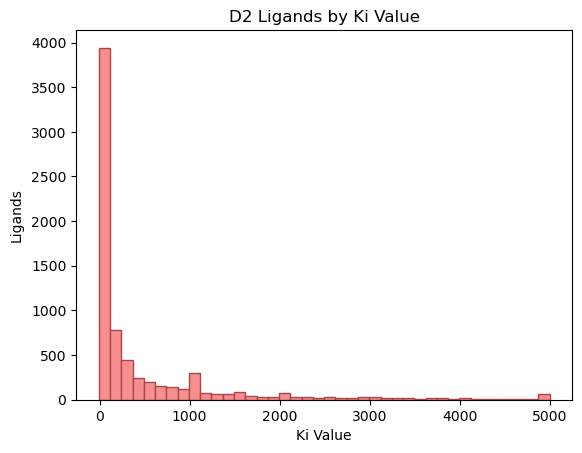

In [16]:
# graph distribution of data in various properties

plt.hist(d2_molecules["value"], bins=40, color="#f58f8fff", edgecolor="#af4345")
plt.title('D2 Ligands by Ki Value')
plt.xlabel('Ki Value')
plt.ylabel('Ligands', labelpad=5)

plt.show()

In [18]:
# choose SMILES representations of all CB2 ligands for deep learning
X = d2_molecules["canonical_smiles"].values

print(f"# of D2 Ligands: {len(X)}")
print(f"Example SMILES: {X[0]}")

# of D2 Ligands: 7252
Example SMILES: NC(=O)[C@H]1CS[C@@H]2CC[C@]3(CCCN3C(=O)[C@@H]3CCCN3)C(=O)N12


In [19]:
# save SMILES representations as TXT file
np.savetxt("./data/D2_SMILES.txt", X, fmt="%s")
print("Saved")

Saved
